In [1]:
import numpy as np
import torch
from scipy import integrate
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
import fnn.training as training
import fnn.functions as func
import os
from res.process_data.dataset import tensor_dataset
from random import shuffle
from fnn.generator import Generator
from fnn.discriminator import Discriminator
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
random_input = np.random.randint(low=-1, high=2, size=(100000, 15, 2))
np.shape(random_input)

(100000, 15, 2)

In [3]:
z_dim = 2
hidden_dim = 16
im_dim = 30
display_step = 782
lr = 0.0003
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
disc_repeats = 5
batch_size = 128
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
gen = Generator(z_dim=2, im_dim=15, hidden_dim=hidden_dim)
disc = Discriminator(im_dim=30, hidden_dim=hidden_dim)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

In [5]:
shuffle = True
num_worker = 0
pin_memory = True
input_tensor = torch.Tensor(random_input)
dataset = tensor_dataset(input_tensor, 15, 2)
dataloader = DataLoader(dataset=dataset,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_worker,
                        pin_memory=pin_memory)

In [6]:
n_epochs = 30
training.training_bce(gen, disc, z_dim, n_epochs, dataloader, device, disc_opt, gen_opt, display_step)

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1, step 782: Generator loss: 0.7173602600079368, discriminator loss: 0.6919903691162551
Epoch 2, step 1564: Generator loss: 0.6993685123103351, discriminator loss: 0.6897873021757509
Epoch 3, step 2346: Generator loss: 0.7102198408692685, discriminator loss: 0.6838509089044293
Epoch 4, step 3128: Generator loss: 0.747532672665614, discriminator loss: 0.6709260627284377
Epoch 5, step 3910: Generator loss: 0.773326831019443, discriminator loss: 0.6619439797328257
Epoch 6, step 4692: Generator loss: 0.7799801581046157, discriminator loss: 0.6594004387898209
Epoch 7, step 5474: Generator loss: 0.7890529866566132, discriminator loss: 0.6562336860105504
Epoch 8, step 6256: Generator loss: 0.788947452136013, discriminator loss: 0.6552124140817492
Epoch 9, step 7038: Generator loss: 0.7915402054024475, discriminator loss: 0.6544620261320375
Epoch 10, step 7820: Generator loss: 0.7926054156344867, discriminator loss: 0.6532786903936225
Epoch 11, step 8602: Generator loss: 0.79496010787346

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

In [18]:
noise = func.get_noise(100,2)
before_sincos_feature = gen.featuremap1.data.numpy()

<AxesSubplot:ylabel='Count'>

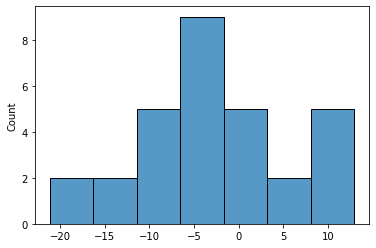

In [19]:
a = []
for i in before_sincos_feature:
    for j in i:
        a.append(j)
sns.histplot(a)

In [11]:
def check_output(epochs):
    output = []
    for i in range(100):
        noise = func.get_noise(16, 2)
        a = gen(noise).data.numpy()
        for j in range(16):
            for k in range(30):
                output.append(a[j][k])
    sns.histplot(output)
    # plt.savefig(f'{epochs}_epoch.png')
    # plt.clf()

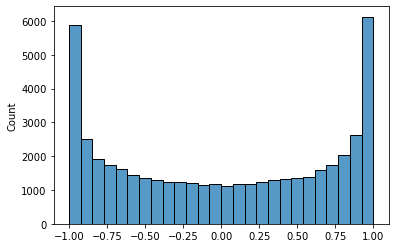

In [14]:
check_output(100)

In [22]:
torch.save({'gen_state_dict': gen.state_dict()}, 'gen_sincos_bce.pth.tar')
torch.save({'disc_state_dict': disc.state_dict()}, 'disc_sincos_bce.pth.tar')